Imports and preparation

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_one_row_per_game = pd.read_csv("../df_one_row_per_game.csv")

#1 CHECK:
finding whether the error is higher as a function of rating type

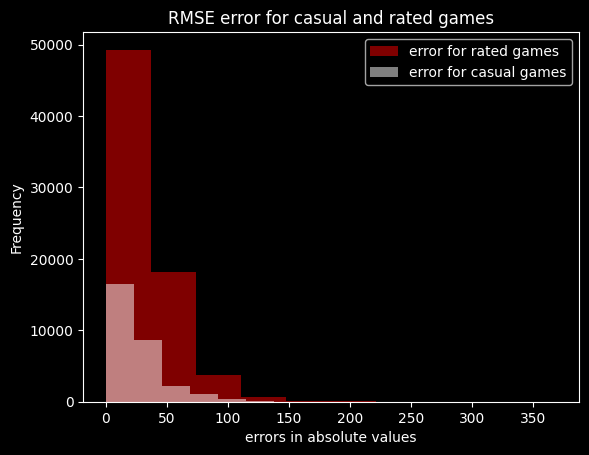

In [13]:
data_casual = df_one_row_per_game[df_one_row_per_game["rating_mode_CASUAL"]]
data_rated = df_one_row_per_game[df_one_row_per_game["rating_mode_RATED"]]

data_casual = abs(data_casual["predictions"] - data_casual["rating"])
data_rated = abs(data_rated["predictions"] - data_rated["rating"])

plt.hist(data_rated, bins=10, alpha=0.5, label='error for rated games', color='red')
plt.hist(data_casual, bins=10, alpha=0.5, label='error for casual games', color='white')
plt.xlabel("errors in absolute values")
plt.ylabel('Frequency')
plt.title('RMSE error for casual and rated games')
plt.legend()
plt.show()

#2 CHECK: finding whether the usage of a certain lexicon created larger losses

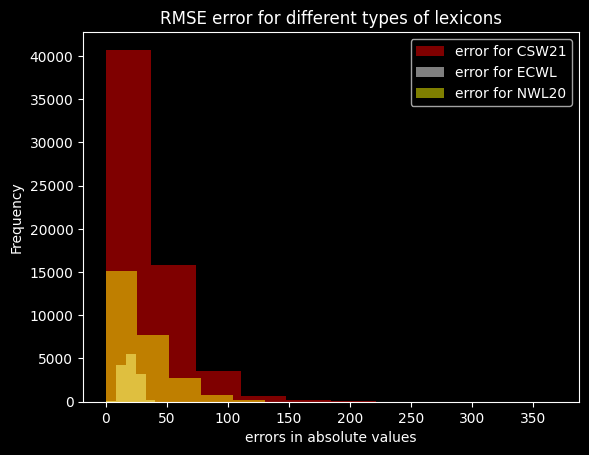

In [11]:
data_CSW21 = df_one_row_per_game[df_one_row_per_game["lexicon_CSW21"]]
data_ECWL = df_one_row_per_game[df_one_row_per_game["lexicon_ECWL"]]
data_NWL20 = df_one_row_per_game[df_one_row_per_game["lexicon_NWL20"]]


data_CSW21 = abs(data_CSW21["predictions"] - data_CSW21["rating"])
data_ECWL = abs(data_ECWL["predictions"] - data_ECWL["rating"])
data_NWL20 = abs(data_NWL20["predictions"] - data_NWL20["rating"])

plt.hist(data_CSW21, bins=10, alpha=0.5, label='error for CSW21', color='red')
plt.hist(data_ECWL, bins=10, alpha=0.5, label='error for ECWL', color='white')
plt.hist(data_NWL20, bins=10, alpha=0.5, label='error for NWL20', color='yellow')

plt.xlabel("errors in absolute values")
plt.ylabel('Frequency')
plt.title('RMSE error for different types of lexicons')
plt.legend()
plt.show()

#CHECK 3: check whether the ammount of games played by a player affects its average mistakes

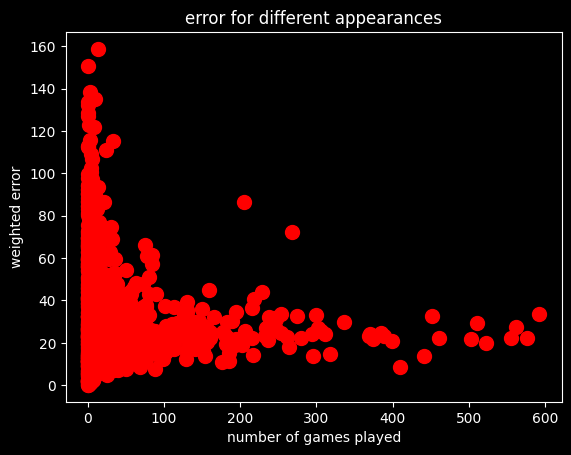

In [21]:
# creating a dictionary from the data for every user
dict_users = {}

def calculate_average_error_for_user(user_name):
    rows_of_user = df_one_row_per_game[df_one_row_per_game["player_to_predict"] == user_name]
    differences = abs(rows_of_user["rating"] - rows_of_user["predictions"])
    return differences.mean()

for name in df_one_row_per_game["player_to_predict"].unique():
    dict_users[name] = (df_one_row_per_game["player_to_predict"].value_counts()[name],
                        calculate_average_error_for_user(name))

dict_users = {key: value for key, value in dict_users.items() if value[0] < 1000}
plt.scatter([value[0] for value in dict_users.values()], [value[1] for value in dict_users.values()],
            color='red', marker='o', s=100)
plt.xlabel("number of games played")
plt.ylabel("weighted error")
plt.title("error for different appearances")

plt.show()